<a href="https://colab.research.google.com/github/diaputr/pcvk/blob/main/Week12_Kelompok_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Kelompok 6**

Agus Prayogi (05 | 2141720025)

Diah Putri Nofianti (12 | 2141720054)

[Jobsheet](https://drive.google.com/file/d/1loGU6BcviqCPFogYtoflA13qgkG13zvg/view)

In [39]:
from google.colab import drive
drive.mount('/content/drive')

faces_path = '/content/drive/Shareddrives/Kita/Kuliah/SMT5/PCVK/Week12/Face Detection'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
from matplotlib import pyplot as plt

# Contoh

In [41]:
def display(img,cmap='gray'):
  fig = plt.figure(figsize=(12,10))
  ax = fig.add_subplot(111)
  ax.imshow(img,cmap='gray')

In [42]:
reeses = cv.imread(f'{faces_path}/reeses_puffs.png',0)
# display(reeses)

In [43]:
cereals = cv.imread(f'{faces_path}/many_cereals.jpg',0)
# display(cereals)

## ORB (Orient FASE and Rotated BRIEF)

In [44]:
orb = cv.ORB_create()
kp1,des1 = orb.detectAndCompute(reeses,None)
kp2,des2 = orb.detectAndCompute(cereals,None)

bf = cv.BFMatcher(cv.NORM_HAMMING,crossCheck=True)
matches = bf.match(des1,des2)
single_match = matches[0]
single_match.distance

71.0

In [45]:
len(matches)

139

(None, (-0.5, 1316.5, 559.5, -0.5))

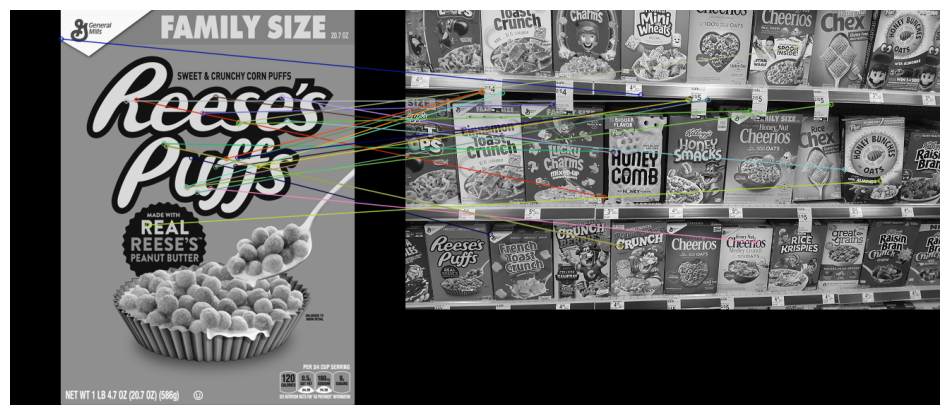

In [46]:
matches = sorted(matches,key=lambda x:x.distance)
reeses_match = cv.drawMatches(reeses,kp1,cereals,kp2,matches[:25],None,flags=2)
display(reeses_match),plt.axis('off')

## SIFT (Scale-Invariant Feature Transform)

In [47]:
sift = cv.xfeatures2d.SIFT_create()
kp1,des1 = sift.detectAndCompute(reeses,None)
kp2,des2 = sift.detectAndCompute(cereals,None)
bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)

good = []

for match1,match2 in matches:
  if match1.distance < 0.75*match2.distance:
    good.append([match1])

len(good)

79

In [48]:
len(matches)

1501

(None, (-0.5, 1316.5, 559.5, -0.5))

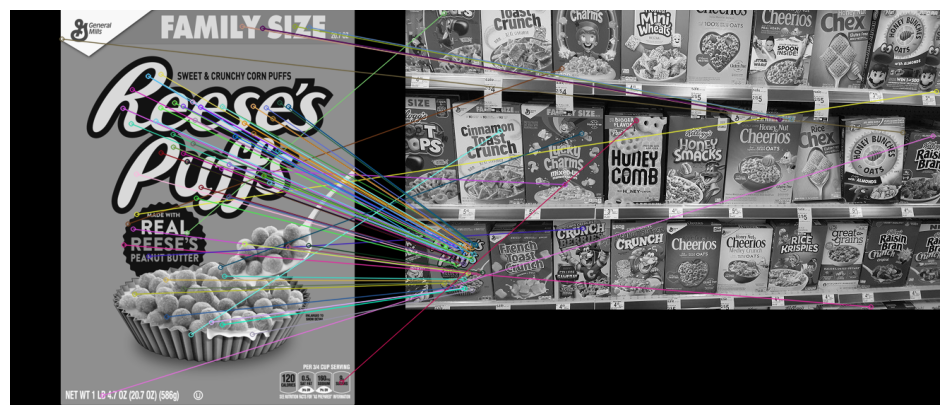

In [49]:
sift_matches = cv.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None,flags=2)
display(sift_matches),plt.axis('off')

## Face Detection

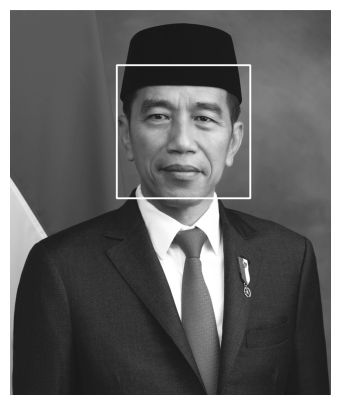

In [68]:
cascade_wajah = cv.CascadeClassifier(f'{faces_path}/haarcascade_frontalface_alt.xml')
presiden = cv.imread(f'{faces_path}/jokowi.jpg',0)
presiden_img = np.copy(presiden)

roi_wajah = cascade_wajah.detectMultiScale(presiden_img)
for (x,y,w,h) in roi_wajah:
  cv.rectangle(presiden_img,(x,y),(x+w,y+h),(255,255,255),3)
  plt.figure(figsize = (5,5))
  plt.imshow(presiden_img, cmap='gray'),plt.axis('off')

# Praktikum

Lakukan Face Detection untuk image object lain yang tersedia pada (/images/facedet). Tampilkan seperti pada contoh berikut. Perhatikan pada hasil face detection dibawah ini. Secara keseluruhan, face detection dapat dilakukan dengan baik, bahkan untuk image berupa gambar bukan foto, wajah bermasker, atau wajah yang berukuran kecil (solvay).

(<Axes: >,
 (-0.5, 872.5, 1049.5, -0.5))

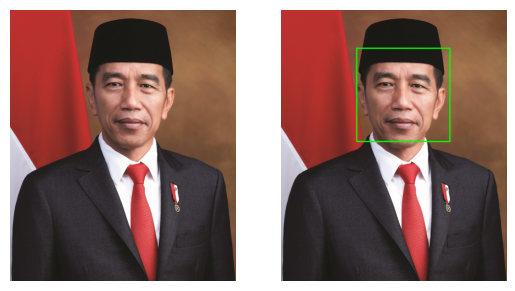

In [51]:
jokowi = cv.imread(f'{faces_path}/jokowi.jpg')
jokowi = cv.cvtColor(jokowi, cv.COLOR_BGR2RGB)
jokowi_img = np.copy(jokowi)

roi_wajah = cascade_wajah.detectMultiScale(jokowi_img)
for (x,y,w,h) in roi_wajah:
  cv.rectangle(jokowi_img,(x,y),(x+w,y+h),(0,255,0),3)

plt.subplot(121),plt.imshow(jokowi),plt.axis('off')
plt.subplot(122),plt.imshow(jokowi_img),plt.axis('off')

(<Axes: >,
 (-0.5, 533.5, 699.5, -0.5))

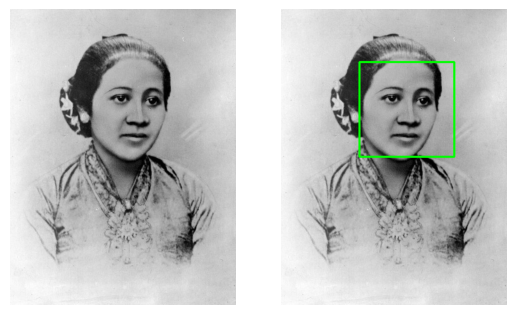

In [52]:
kartini = cv.imread(f'{faces_path}/kartini.jpg')
kartini_img = np.copy(kartini)

roi_wajah = cascade_wajah.detectMultiScale(kartini_img)
for (x,y,w,h) in roi_wajah:
  cv.rectangle(kartini_img,(x,y),(x+w,y+h),(0,255,0),3)

plt.subplot(121),plt.imshow(kartini),plt.axis('off')
plt.subplot(122),plt.imshow(kartini_img),plt.axis('off')

(<Axes: >,
 (-0.5, 725.5, 479.5, -0.5))

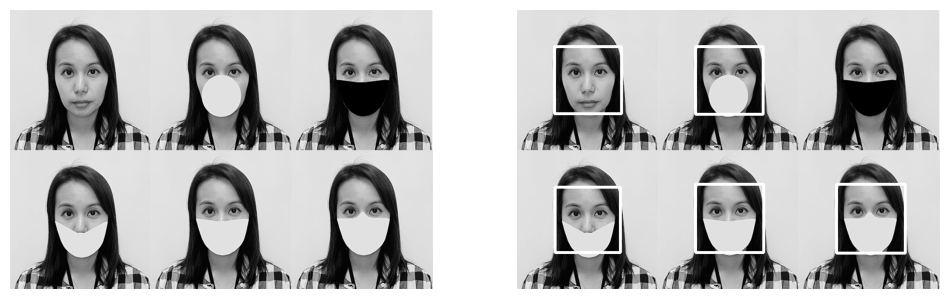

In [61]:
mask = cv.imread(f'{faces_path}/mask.png',0)
mask_img = np.copy(mask)

roi_wajah = cascade_wajah.detectMultiScale(mask_img)
for (x,y,w,h) in roi_wajah:
  cv.rectangle(mask_img,(x,y),(x+w,y+h),(255,255,255),3)

plt.figure(figsize = (12,12))
plt.subplot(121),plt.imshow(mask,cmap='gray'),plt.axis('off')
plt.subplot(122),plt.imshow(mask_img,cmap='gray'),plt.axis('off')

(<Axes: >,
 (-0.5, 397.5, 567.5, -0.5))

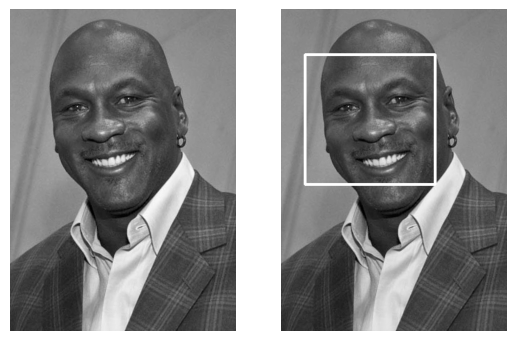

In [62]:
mjordan = cv.imread(f'{faces_path}/mjordan.jpg',0)
mjordan_img = np.copy(mjordan)

roi_wajah = cascade_wajah.detectMultiScale(mjordan_img)
for (x,y,w,h) in roi_wajah:
  cv.rectangle(mjordan_img,(x,y),(x+w,y+h),(255,255,255),3)

plt.subplot(121),plt.imshow(mjordan,cmap='gray'),plt.axis('off')
plt.subplot(122),plt.imshow(mjordan_img,cmap='gray'),plt.axis('off')

(<Axes: >,
 (-0.5, 1049.5, 759.5, -0.5))

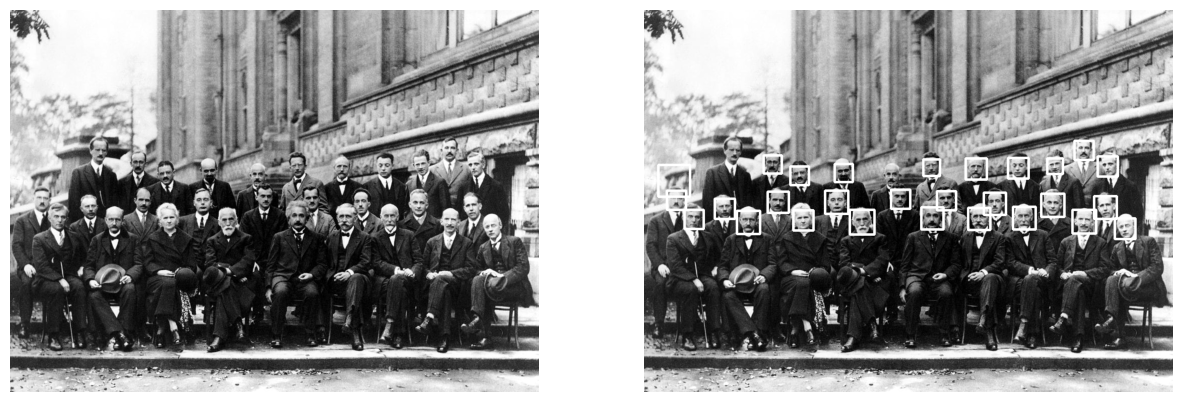

In [65]:
solvayconf = cv.imread(f'{faces_path}/solvayconf.jpg',0)
solvayconf_img = np.copy(solvayconf)

roi_wajah = cascade_wajah.detectMultiScale(solvayconf_img)
for (x,y,w,h) in roi_wajah:
  cv.rectangle(solvayconf_img,(x,y),(x+w,y+h),(255,255,255),3)

plt.figure(figsize = (15,15))
plt.subplot(121),plt.imshow(solvayconf,cmap='gray'),plt.axis('off')
plt.subplot(122),plt.imshow(solvayconf_img,cmap='gray'),plt.axis('off')

## Cat Face Detection

(<Axes: >,
 (-0.5, 599.5, 399.5, -0.5))

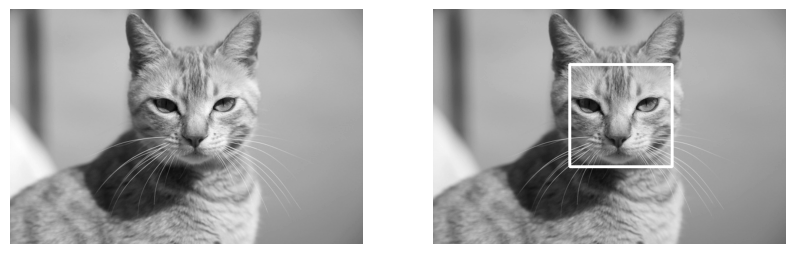

In [53]:
cascade_kucing = cv.CascadeClassifier(f'{faces_path}/haarcascade_frontalcatface.xml')
kucing = cv.imread(f'{faces_path}/mycat.jpg',0)
kucing_img = np.copy(kucing)

roi_kucing = cascade_kucing.detectMultiScale(kucing_img, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
filtered_roi_kucing = [roi for roi in roi_kucing if roi[2] > 150 and roi[3] > 150]

for (x,y,w,h) in filtered_roi_kucing:
  cv.rectangle(kucing_img,(x,y),(x+w,y+h),(255,255,0),3)

plt.figure(figsize = (10,10))
plt.subplot(121),plt.imshow(kucing,cmap='gray'),plt.axis('off')
plt.subplot(122),plt.imshow(kucing_img,cmap='gray'),plt.axis('off')

## Eye Detection

(<Axes: >,
 (-0.5, 872.5, 1049.5, -0.5))

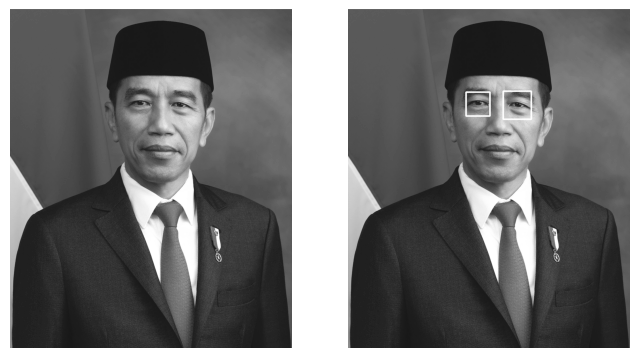

In [72]:
cascade_mata = cv.CascadeClassifier(f'{faces_path}/haarcascade_eye.xml')
jokowi_eyes = np.copy(presiden)

roi_mata = cascade_mata.detectMultiScale(jokowi_eyes)
for (x,y,w,h) in roi_mata:
  cv.rectangle(jokowi_eyes,(x,y),(x+w,y+h),(255,255,0),3)

plt.figure(figsize = (8,8))
plt.subplot(121),plt.imshow(presiden,cmap='gray'),plt.axis('off')
plt.subplot(122),plt.imshow(jokowi_eyes,cmap='gray'),plt.axis('off')

## Face Tracking

## Face Blurring

## Angka
Kita akan menggunakan Deep Learning untuk melakukan pengenalan karakter
Sebelum melakukan training data, terlebih dahulu di siapkan data yang akan dilakukan
training yaitu data image nomor angka 0-9. Untuk membuat data tersebut bisa
gunakan image editor untuk dilakukan croping satu persatu. Kemudian selanjutnya
gunakan source code di bawah ini untuk proses persiapan untuk training.

In [57]:
import os
import tqdm
import random
import pickle

# Direktori data training
DATADIR = "dataset/training"

In [ ]:
dirs = []
training_data = []
width, height = 100, 100
# Looping direktori data training untuk diambil nama karakternya
for char_name in sorted(os.listdir(DATADIR)):
  dirs.append(char_name)
# Looping semua image data training untuk diubah menjadi array
for char_name in dirs:
  path = os.path.join(DATADIR, char_name)
  class_number = dirs.index(char_name)
for img in tqdm(os.listdir(path)):
  try:
    img_array = cv.imread(os.path.join(data_dir_testing, car,char_image), cv.IMREAD_ANYCOLOR)
    new_array = cv.resize(img_array, (width, height))
    training_data.append([new_array, class_number])
  except Exception as e:
    pass

random.shuffle(training_data)
X = []
Y = []

for feature, label in training_data:
  X.append(feature)
  Y.append(label)
  X = np.array(X).reshape(-1, width, height, 1)
# Tulis ke file pickle
pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()
pickle_out = open("Y.pickle", "wb")
pickle.dump(Y, pickle_out)
pickle_out.close()

# Tugas